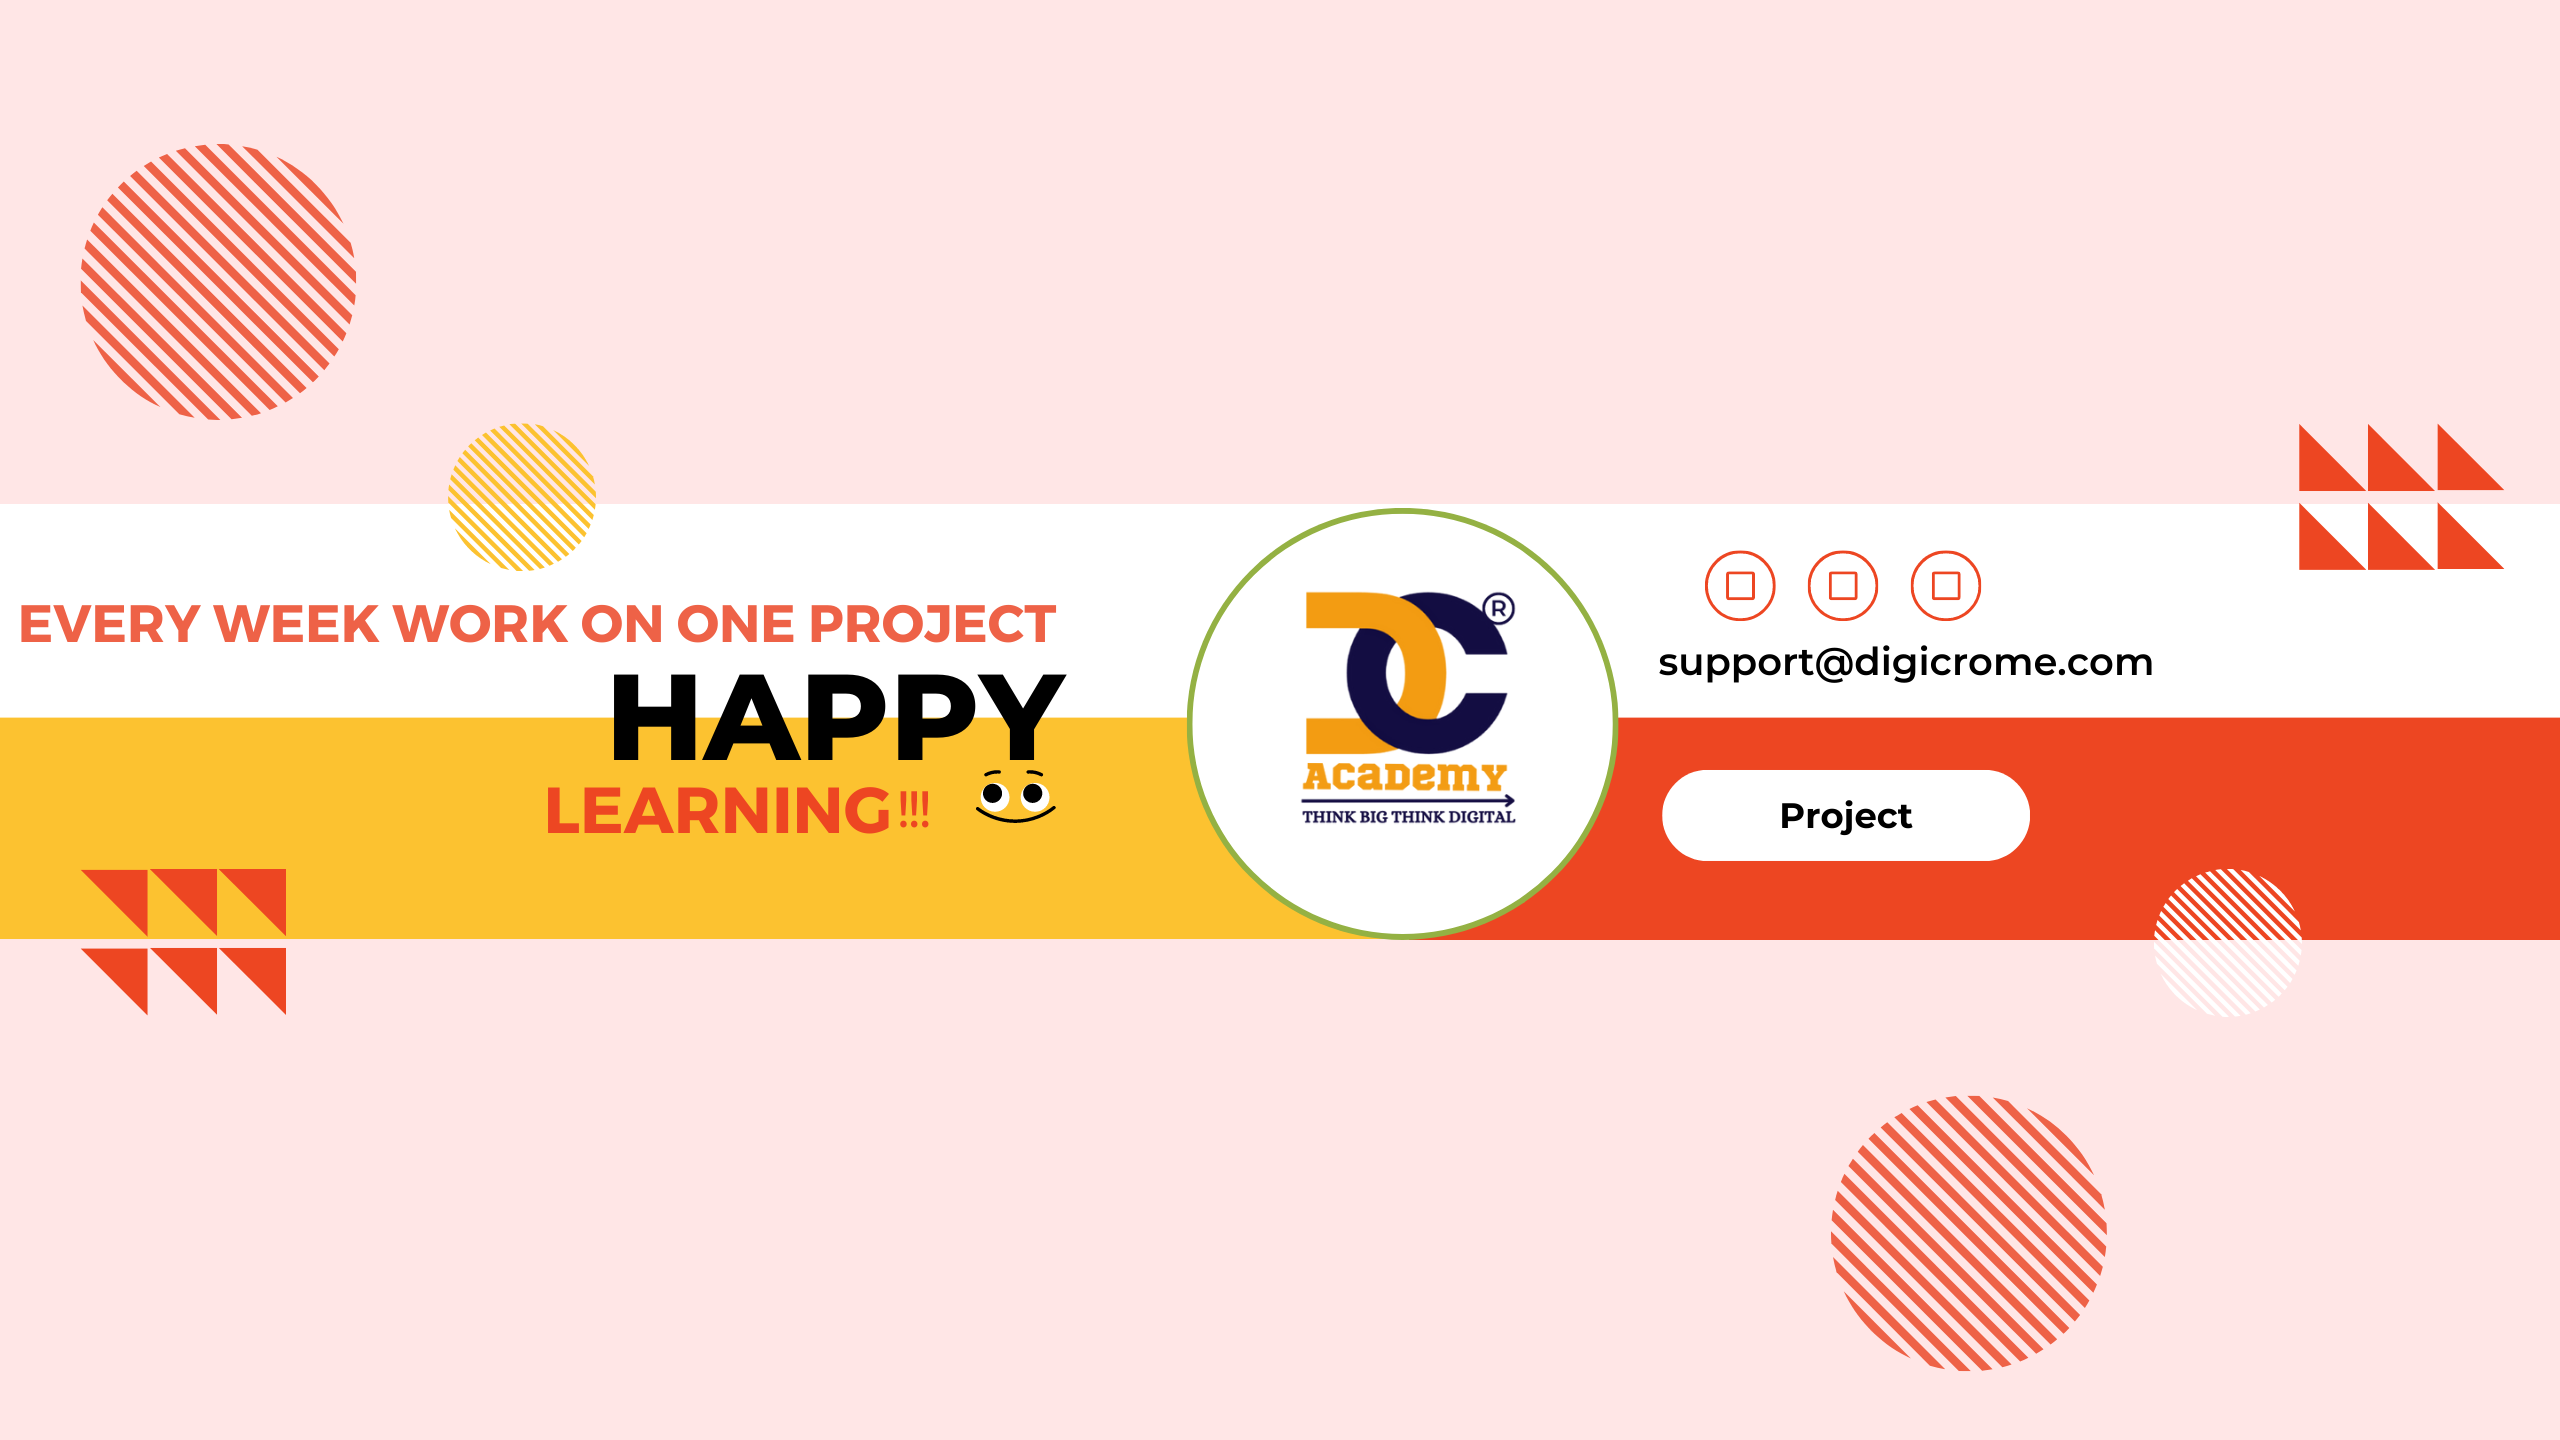

In [1]:
from IPython import display
display.Image("jupyter banner.png")

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
data=sns.load_dataset( 'diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# $ Data Details : $


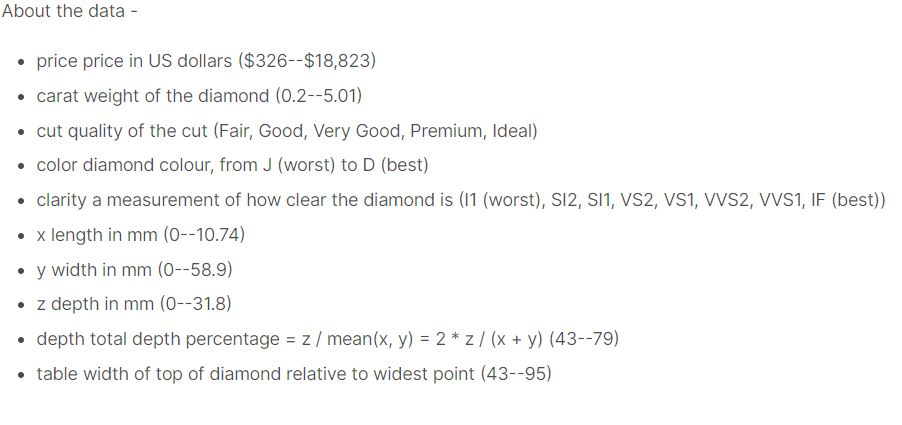

In [7]:
display.Image("diamonds.jpg")

### Target Value is Y= Price Column

* Predict the price of a diamond based on independent variables like carat, color, cut, clarity, table and dimensions (x ,y ,z) using  linear regression..
* Does their color, cut, carat, or dimension play any role here.
* Best case scenario where no price is least.
#### Once you learn Machine Learning Classification please also build a model that predict price of a diamond and dependency of price on different factors.
#### Once you learn Deep Learning ANN please also build a model that predict price of a diamond and dependency of price on different factors.

In [4]:
print("The shape of data is",data.shape)

The shape of data is (53940, 10)


There are 53940 rows and 10 columns in the data

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

### We found no inconsistency in the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### Observations:-
1)There are no null values

In [8]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Q)-Does their color, cut, carat, or dimension play any role here.

From the correlation table we can find that Carat and Dimensions are highly corelated to the price od the diamondm

In [9]:
categorical_cols, numerical_cols = [],[]

for i in data.columns:
    print("The Data Type for {} is {}".format(i,data[i].dtypes))
    if data[i].dtypes == 'category':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)

The Data Type for carat is float64
The Data Type for cut is category
The Data Type for color is category
The Data Type for clarity is category
The Data Type for depth is float64
The Data Type for table is float64
The Data Type for price is int64
The Data Type for x is float64
The Data Type for y is float64
The Data Type for z is float64


In [10]:
categorical_cols

['cut', 'color', 'clarity']

In [11]:
numerical_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [12]:
for i in data.columns:
    print('*'*50)
    print("The Data Type of {} is {}".format(i,data[i].dtypes))
    if data[i].dtypes == 'category':
        print("Top 10 categories of {} are".format(i))
        print(data[i].value_counts().sort_values(ascending=False).head(10))
        print('*'*50)

**************************************************
The Data Type of carat is float64
**************************************************
The Data Type of cut is category
Top 10 categories of cut are
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
**************************************************
**************************************************
The Data Type of color is category
Top 10 categories of color are
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
**************************************************
**************************************************
The Data Type of clarity is category
Top 10 categories of clarity are
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
**************************************************
*************************************************

In [13]:
for i in data.columns:
    print('*' * 50)
    print("The Data Type of {} is".format(i))
    if data[i].dtypes == "category":
        print("Bottom 10 categories for {} are".format(i))
        print(data[i].value_counts().sort_values(ascending = True).head(10))
        print('*'*50)

**************************************************
The Data Type of carat is
**************************************************
The Data Type of cut is
Bottom 10 categories for cut are
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64
**************************************************
**************************************************
The Data Type of color is
Bottom 10 categories for color are
J     2808
I     5422
D     6775
H     8304
F     9542
E     9797
G    11292
Name: color, dtype: int64
**************************************************
**************************************************
The Data Type of clarity is
Bottom 10 categories for clarity are
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12258
SI1     13065
Name: clarity, dtype: int64
**************************************************
**************************************************
The Data Type of dept

In [14]:
import matplotlib.pyplot as plt

**************************************************
The Data Type of cut is
Top 10 categories of cut are
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


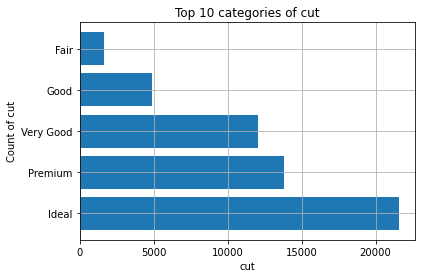

**************************************************
**************************************************
The Data Type of color is
Top 10 categories of color are
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


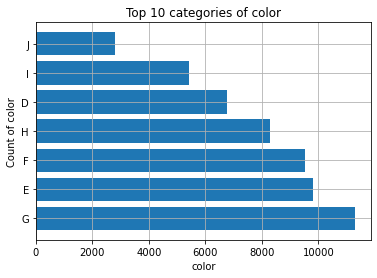

**************************************************
**************************************************
The Data Type of clarity is
Top 10 categories of clarity are
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


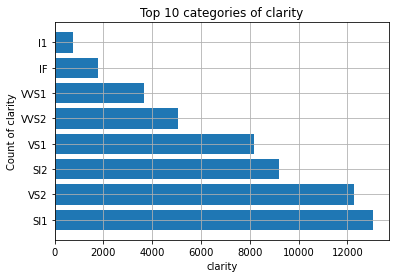

**************************************************


In [15]:
for i in categorical_cols:
    print("*"*50)
    print("The Data Type of {} is".format(i))
    print("Top 10 categories of {} are".format(i))
    print(data[i].value_counts().sort_values(ascending = False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).head(10).index
    values = data[i].value_counts().sort_values(ascending=False).head(10).values
    plt.barh(index,values)
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories of {}".format(i))
    plt.grid()
    plt.show()
    print("*"*50)

**************************************************
The Data Type of carat is
Top 10 categories of carat are
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
Name: carat, dtype: int64


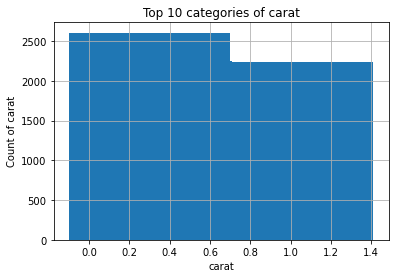

**************************************************
**************************************************
The Data Type of cut is
Top 10 categories of cut are
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


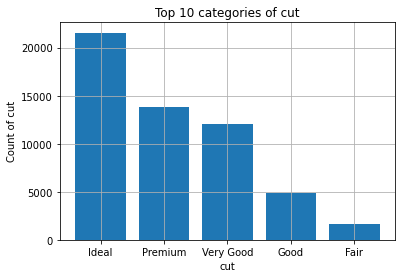

**************************************************
**************************************************
The Data Type of color is
Top 10 categories of color are
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


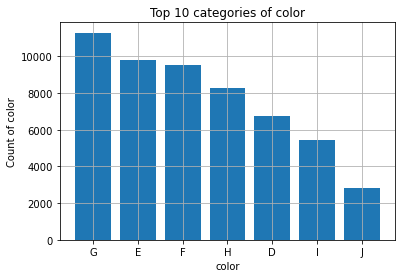

**************************************************
**************************************************
The Data Type of clarity is
Top 10 categories of clarity are
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


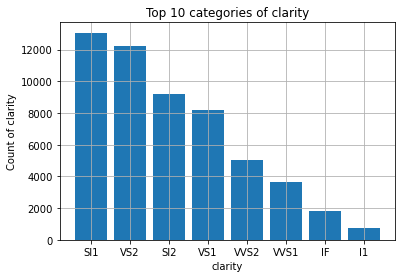

**************************************************
**************************************************
The Data Type of depth is
Top 10 categories of depth are
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
61.6    1956
62.3    1940
61.7    1904
62.4    1792
61.5    1719
Name: depth, dtype: int64


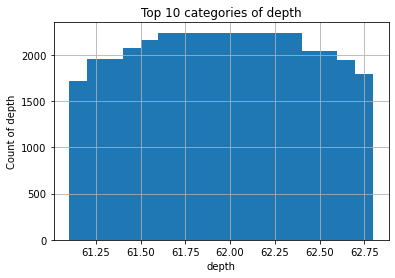

**************************************************
**************************************************
The Data Type of table is
Top 10 categories of table are
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
60.0    4241
54.0    2594
61.0    2282
62.0    1273
63.0     588
Name: table, dtype: int64


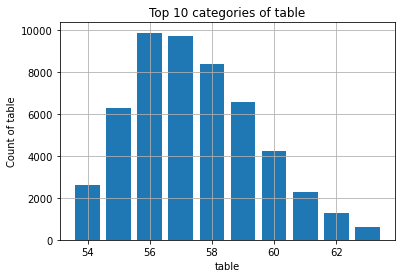

**************************************************
**************************************************
The Data Type of price is
Top 10 categories of price are
605    132
802    127
625    126
828    125
776    124
698    121
789    121
544    120
666    114
552    113
Name: price, dtype: int64


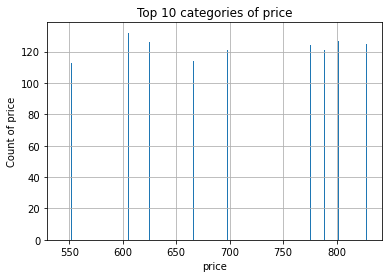

**************************************************
**************************************************
The Data Type of x is
Top 10 categories of x are
4.37    448
4.34    437
4.33    429
4.38    428
4.32    425
4.35    407
4.39    388
4.31    387
4.36    386
4.40    373
Name: x, dtype: int64


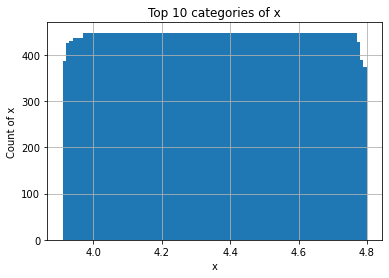

**************************************************
**************************************************
The Data Type of y is
Top 10 categories of y are
4.34    437
4.37    435
4.35    425
4.33    421
4.32    414
4.39    407
4.38    406
4.40    387
4.31    386
4.41    384
Name: y, dtype: int64


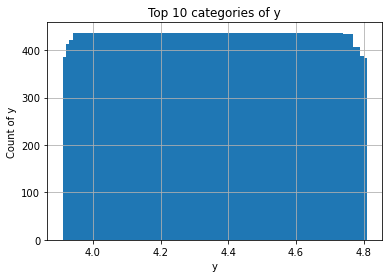

**************************************************
**************************************************
The Data Type of z is
Top 10 categories of z are
2.70    767
2.69    748
2.71    738
2.68    730
2.72    697
2.67    649
2.73    612
2.66    555
2.74    548
4.02    538
Name: z, dtype: int64


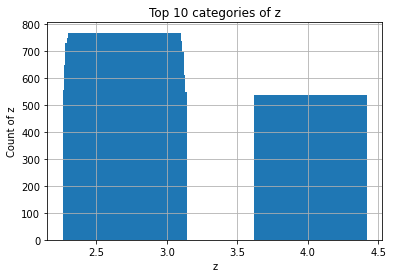

**************************************************


In [16]:
for i in data.columns:
    print("*"*50)
    print("The Data Type of {} is".format(i))
    print("Top 10 categories of {} are".format(i))
    print(data[i].value_counts().sort_values(ascending = False).head(10))
    index = data[i].value_counts().sort_values(ascending=False).head(10).index
    values = data[i].value_counts().sort_values(ascending=False).head(10).values
    plt.bar(index,values)
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories of {}".format(i))
    plt.grid()
    plt.show()
    print("*"*50)

**************************************************
Top 10 categories for cut are
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64


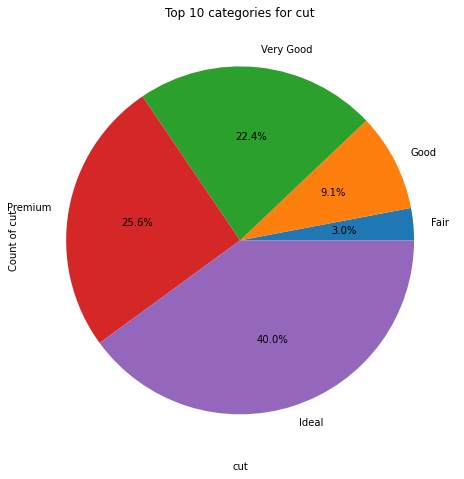

**************************************************
**************************************************
Top 10 categories for color are
J     2808
I     5422
D     6775
H     8304
F     9542
E     9797
G    11292
Name: color, dtype: int64


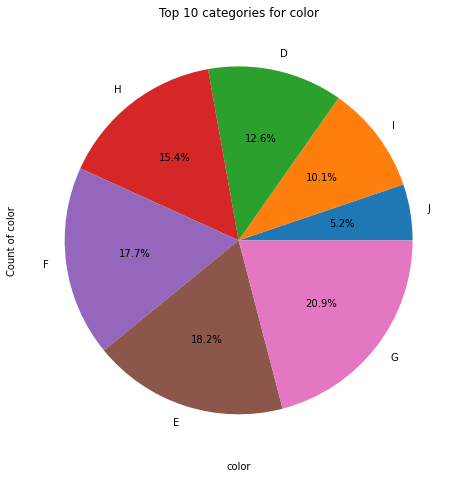

**************************************************
**************************************************
Top 10 categories for clarity are
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12258
SI1     13065
Name: clarity, dtype: int64


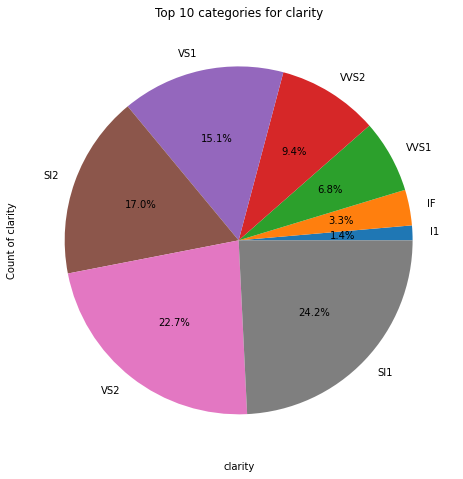

**************************************************


In [17]:
for i in categorical_cols:
    print("*"*50)
    print("Top 10 categories for {} are".format(i))
    print(data[i].value_counts().sort_values(ascending=True).head(10))
    index = data[i].value_counts().sort_values(ascending=True).index
    values = data[i].value_counts().sort_values(ascending=True).values
    plt.figure(figsize=[10,8])
    
    plt.pie(values,labels = index,autopct = '%.1f%%')
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories for {}".format(i))
    plt.grid()
    plt.show();
    print("*"*50)

**************************************************
Top 10 categories for cut is
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64


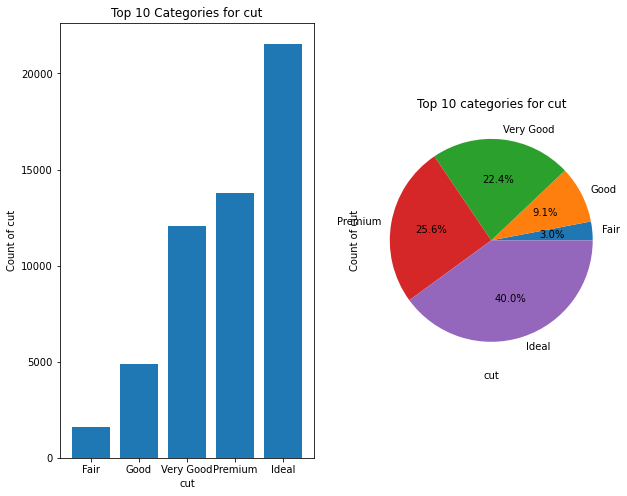

**************************************************
**************************************************
Top 10 categories for color is
J     2808
I     5422
D     6775
H     8304
F     9542
E     9797
G    11292
Name: color, dtype: int64


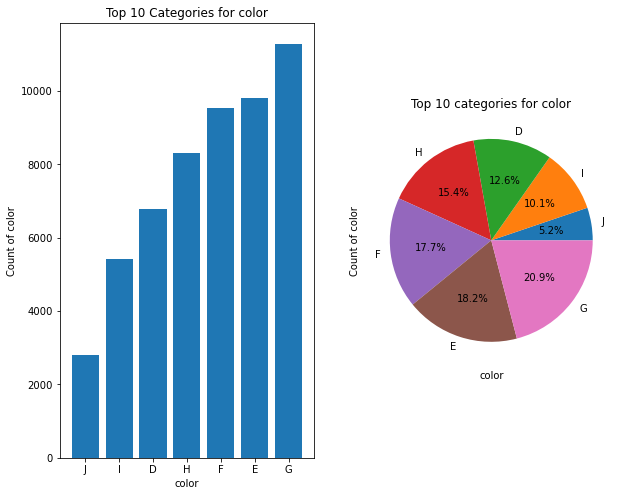

**************************************************
**************************************************
Top 10 categories for clarity is
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12258
SI1     13065
Name: clarity, dtype: int64


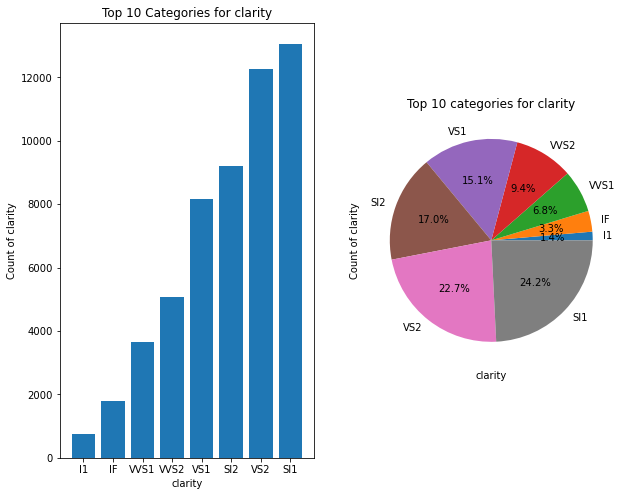

**************************************************


In [18]:
for i in categorical_cols:
    print("*"*50)
    print("Top 10 categories for {} is".format(i))
    print(data[i].value_counts().sort_values(ascending=True).head(10))
    index = data[i].value_counts().sort_values(ascending=True).index
    values = data[i].value_counts().sort_values(ascending=True).values
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    plt.bar(index,values)
    plt.ylabel('Count of {}'.format(i))
    plt.xlabel(i)
    plt.title("Top 10 Categories for {}".format(i))
    plt.subplot(1,2,2)
    plt.pie(values,labels=index,autopct = '%.1f%%')
    plt.xlabel(i)
    plt.ylabel("Count of {}".format(i))
    plt.title("Top 10 categories for {}".format(i))
    plt.grid()
    plt.show();
    print("*"*50)

In [19]:
data.skew()

C:\Users\sneha\AppData\Local\Temp\ipykernel_15332\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

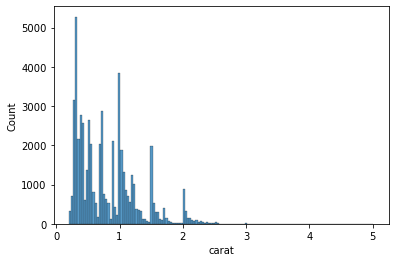

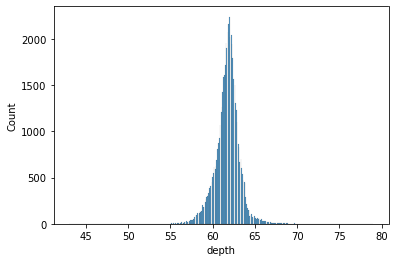

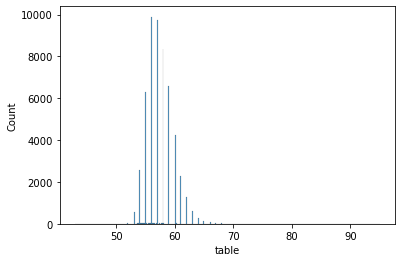

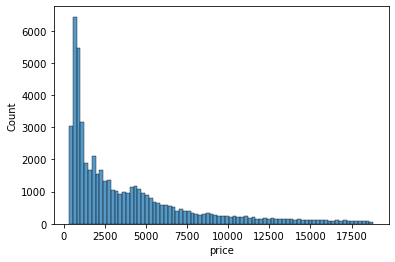

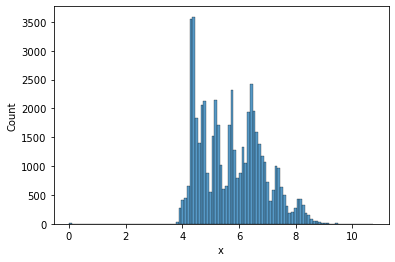

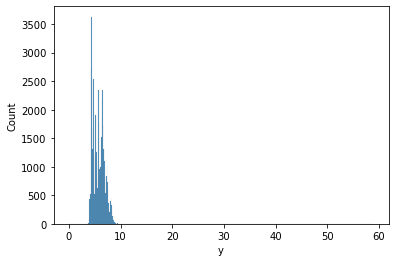

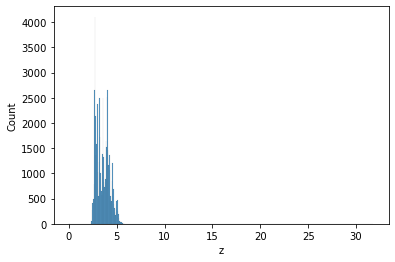

In [20]:
for i in numerical_cols:
    sns.histplot(data=data,x=i)
    plt.show()

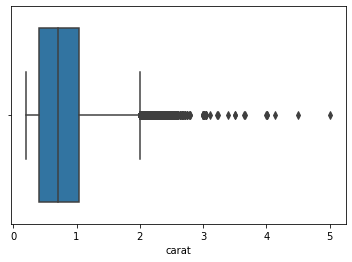

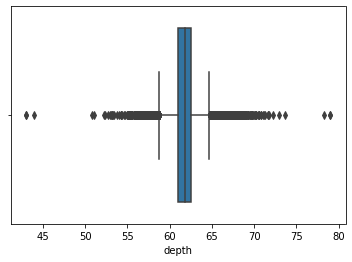

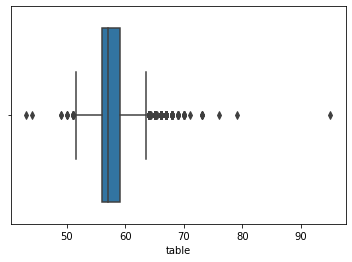

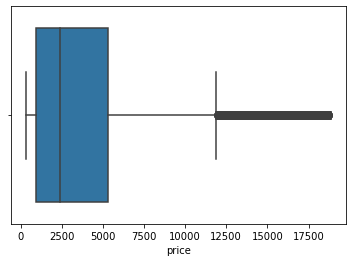

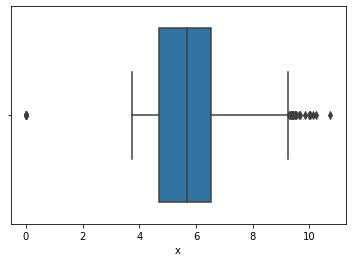

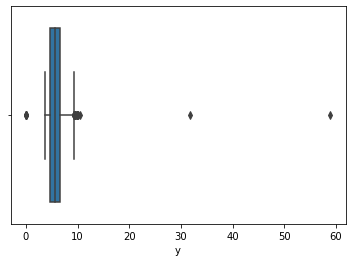

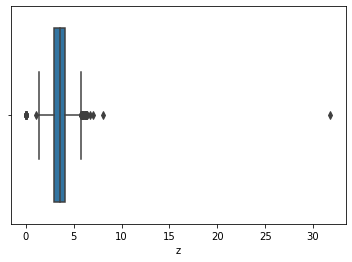

In [21]:
for i in numerical_cols:
    sns.boxplot(data=data,x=i)
    plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
data_scaled = scaler.fit_transform(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

In [24]:
data_scaled

array([[-1.19816781, -0.17409151, -1.09967199, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.08811478,
         0.11861587,  0.14349912]])

(array([[0.0000e+00, 5.7300e+02, 5.3353e+04, 1.4000e+01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.0000e+00, 5.6200e+03, 4.8258e+04, 5.4000e+01, 3.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.5590e+03, 5.0355e+04, 2.5000e+01, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.3940e+04, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.1320e+03, 4.5808e+04, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.0890e+03, 4.6849e+04, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 7.6730e+03, 4.6264e+04, 2.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]]),
 array([-13.08760274,  -7

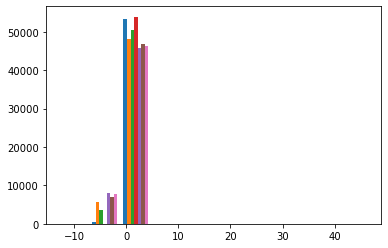

In [25]:
plt.hist(data_scaled)

In [26]:
numerical_scaled = pd.DataFrame(data_scaled,columns=['carat_scaled', 'depth_scaled', 'table_scaled', 'price_scaled', 'x_scaled', 'y_scaled', 'z_scaled'])

In [27]:
numerical_scaled

,carat_scaled,depth_scaled,table_scaled,price_scaled,x_scaled,y_scaled,z_scaled
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


(array([2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-1.26145803, -0.24670476,  0.7680485 ,  1.78280177,  2.79755504,
         3.8123083 ,  4.82706157,  5.84181484,  6.8565681 ,  7.87132137,
         8.88607464]),
 <BarContainer object of 10 artists>)

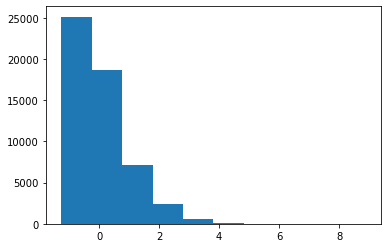

In [28]:
plt.hist(numerical_scaled["carat_scaled"])

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_scaled_minmax = minmax.fit_transform(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

In [30]:
data_scaled_minmax

array([[0.00623701, 0.51388889, 0.23076923, ..., 0.36778399, 0.06757216,
        0.07641509],
       [0.002079  , 0.46666667, 0.34615385, ..., 0.36219739, 0.06519525,
        0.07264151],
       [0.00623701, 0.38611111, 0.42307692, ..., 0.37709497, 0.06910017,
        0.07264151],
       ...,
       [0.1039501 , 0.55      , 0.32692308, ..., 0.52700186, 0.09643463,
        0.11194969],
       [0.13721414, 0.5       , 0.28846154, ..., 0.5726257 , 0.10390492,
        0.11761006],
       [0.11434511, 0.53333333, 0.23076923, ..., 0.54283054, 0.09966044,
        0.11446541]])

(array([[2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
         5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00],
        [3.0000e+00, 0.0000e+00, 1.2000e+01, 3.0400e+02, 1.2041e+04,
         4.0468e+04, 1.0320e+03, 7.4000e+01, 3.0000e+00, 3.0000e+00],
        [2.0000e+00, 6.5700e+02, 3.7561e+04, 1.5131e+04, 5.6300e+02,
         2.3000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [2.5335e+04, 9.3280e+03, 7.3930e+03, 3.8780e+03, 2.3640e+03,
         1.7450e+03, 1.3060e+03, 1.0020e+03, 8.6300e+02, 7.2600e+02],
        [8.0000e+00, 0.0000e+00, 0.0000e+00, 2.9340e+03, 2.0790e+04,
         1.4545e+04, 1.2205e+04, 3.2600e+03, 1.9100e+02, 7.0000e+00],
        [3.0633e+04, 2.3305e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.9534e+04, 3.4400e+04, 5.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]]),
 array([0. , 0.1, 0.2, 0.

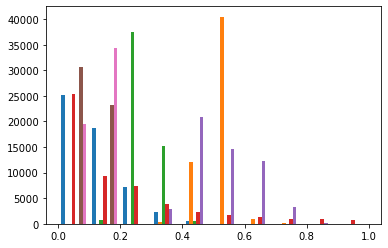

In [31]:
plt.hist(data_scaled_minmax)

In [32]:
numerical_scaled_minmax = pd.DataFrame(data_scaled,columns =['carat_scaled', 'depth_scaled', 'table_scaled', 'price_scaled', 'x_scaled', 'y_scaled', 'z_scaled'])

In [33]:
numerical_scaled_minmax

,carat_scaled,depth_scaled,table_scaled,price_scaled,x_scaled,y_scaled,z_scaled
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


In [34]:
numerical_scaled_minmax = pd.DataFrame(data_scaled_minmax,columns =['carat_scaled_minmax', 'depth_scaled_minmax', 'table_scaled_minmax', 'price_scaled_minmax', 'x_scaled_minmax', 'y_scaled_minmax', 'z_scaled_minmax'])

In [35]:
numerical_scaled_minmax

,carat_scaled_minmax,depth_scaled_minmax,table_scaled_minmax,price_scaled_minmax,x_scaled_minmax,y_scaled_minmax,z_scaled_minmax
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.108108,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.103950,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.137214,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


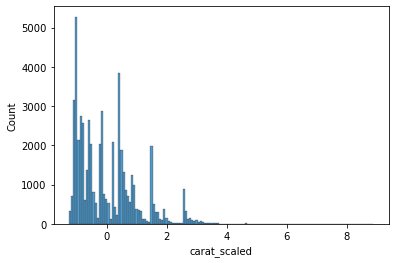

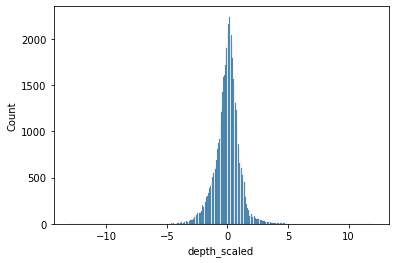

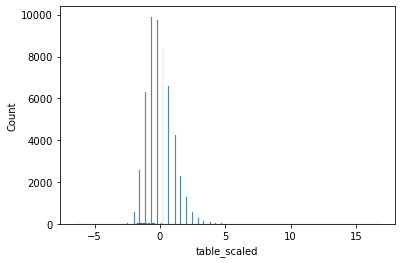

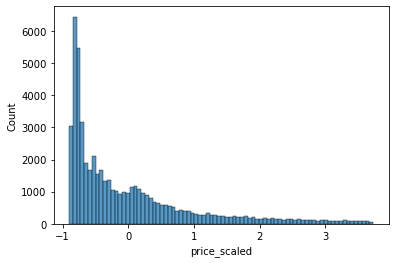

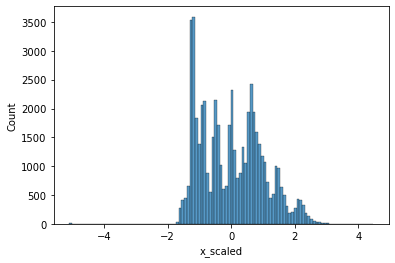

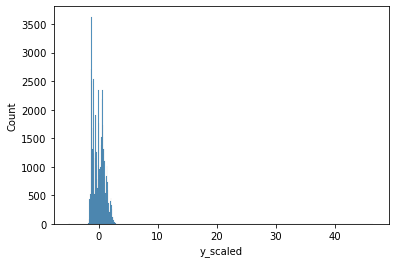

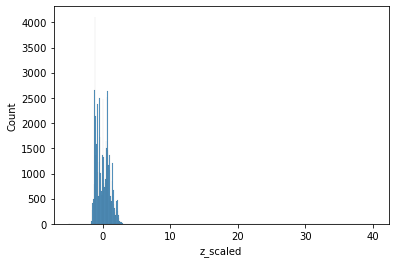

In [36]:
for i in ['carat_scaled', 'depth_scaled', 'table_scaled', 'price_scaled', 'x_scaled', 'y_scaled', 'z_scaled']:
    sns.histplot(data=numerical_scaled,x=i)
    plt.show()

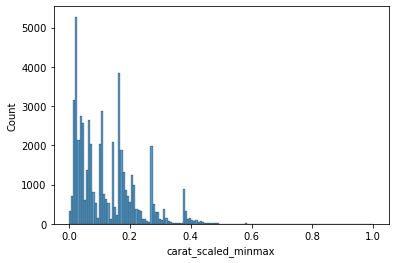

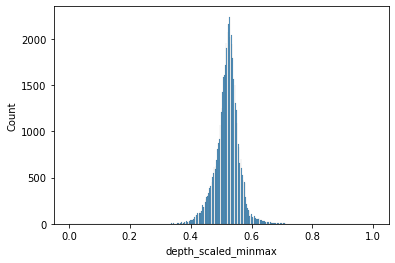

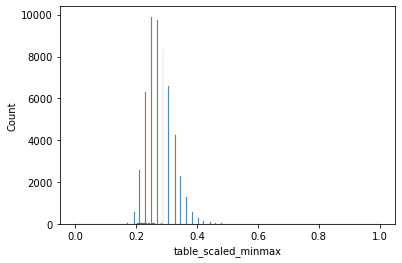

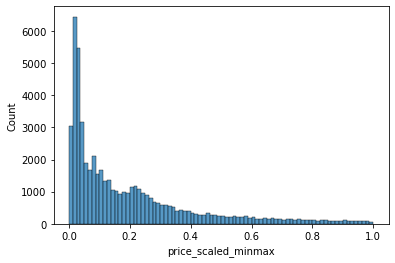

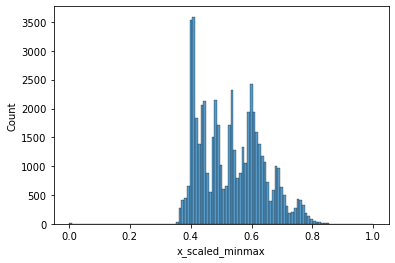

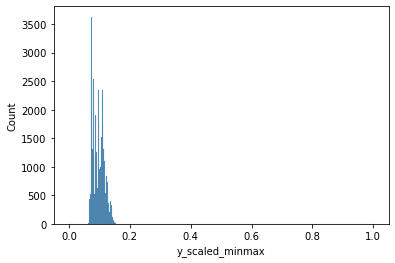

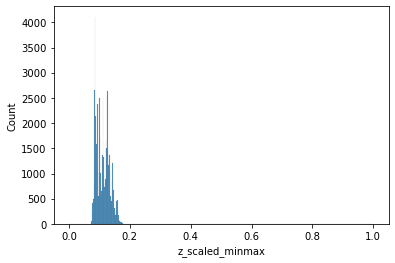

In [37]:
for i in ['carat_scaled_minmax', 'depth_scaled_minmax', 'table_scaled_minmax', 'price_scaled_minmax', 'x_scaled_minmax', 'y_scaled_minmax', 'z_scaled_minmax']:
    sns.histplot(data=numerical_scaled_minmax,x=i)
    plt.show()

In [38]:
## Bi Variate Data Analysis

In [39]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Does their color, cut, carat, or dimension play any role here.

In [42]:
data.groupby(by=['color','cut','carat','x','y','z','price'])['price']

### Modelling

In [43]:
## Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['cut'] = encoder.fit_transform(data['cut'])
data['color'] = encoder.fit_transform(data['color'])
data['clarity'] = encoder.fit_transform(data['clarity'])



In [44]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [45]:
data['clarity'].value_counts()

2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: clarity, dtype: int64

In [55]:
## Define X and y

X,y = data.drop(['price'],axis = 1), data['price']

In [56]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [59]:
validation_predictions= model.predict(X_test)

In [60]:
validation_predictions

array([ 5142.54599863,   438.91043124,  1417.21208535, ...,
        3230.79075533, 13957.34788232,  1971.73893001])

In [66]:
from sklearn.metrics import r2_score

In [67]:
print("The R2 score of Linear Regression Model is",r2_score(y_test,validation_predictions))

The R2 score of Linear Regression Model is 0.8828985269631983


In [68]:
train_data_predictions = model.predict(X_train)

In [69]:
print("The R2 score of Train Data Linear Regression Model is",r2_score(y_train,train_data_predictions))

The R2 score of Train Data Linear Regression Model is 0.885593288882474


In [71]:
# visualise test and validation predictions

# visualise the validation predictions

index = []
for i in range(len(X_test)):
    index.append(i)

In [72]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


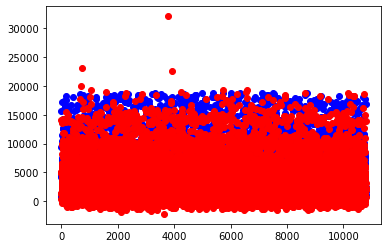

In [74]:
plt.scatter(index,y_test,color = 'blue')
plt.scatter(index,validation_predictions,color='red')
plt.show()